# Neutrino Mass Ordering Determination with the Supernova Neutrinos
`Author: Miao Yu`

## I. Motivation
Determining neutrino mass ordering with the supernova neutrinos have been widely discussed before. The upcoming large liquid scintillator experiment JUNO, have the capacitity to detect different channels benefitted from the low detection threshold, large target mass and other advantages. Therefore, it is inspiring to explore the potential to determine neutrino mass ordering in JUNO by combining information from different detection channels.

There are plenty of numerical models to describe the supernova explosion and neutrino emission, like Garching models, Japan models and so on. It is troubling to handle the model dependency in the study. However, we found that the description of the neutronization burst are quite similar among different models, which can be regarded as a "standard candle". Therefore, we focus on the determination ability using the data around the burst phases.

## II. Supernova Numerical Models
Different numerical models have been tested during study, including Garching models, Burrows models and so on from the open-source SNEWPY package (https://github.com/YMTheory/snewpy). The local simulation codes provide...
- Initial luminosity, average energy, event number (given $T$, $E_\nu$) for different flavours from the SN;
- Neutrino fluence arriving at the detector (considering distances, flavour conversion...);
- visible energy spectrum (given $T$) for different flavours and different channels in the detector; 

### II (1). Inital Model Comparison


Detailed comparison between Garching models the Burrows 2D model are performed because of different data formats. Inital luminosity, neutrino number, neutrino energy spectra from the supernova are compared below, where we use the Garching 82503 model and 12 solar masses Burrows model. Due to the different time definitions in these two datasets (post-explosion time in Garching models and post-bounce time in Burrows models), we added a $30\,\mathrm{ms}$ shift manually.

The first plot shows the luminosity of three flavours, while the 2nd the 3rd plots show the neutrino numbers per second for three flavours. For $\nu_e$. The Garching model gives larger statistics than the Burrows model in alomst all the time range (green lines). The average numbers of $\bar\nu_e$ are quite similar for the two compared models (blue lines). A sharp increase of $\nu_x$ appears at the beginning and then a relative flatter increase follows in the Burrows model. While in the Garching model, the slope is quite stable. And the last figure shows the average neutrino energy ot the three flavours.

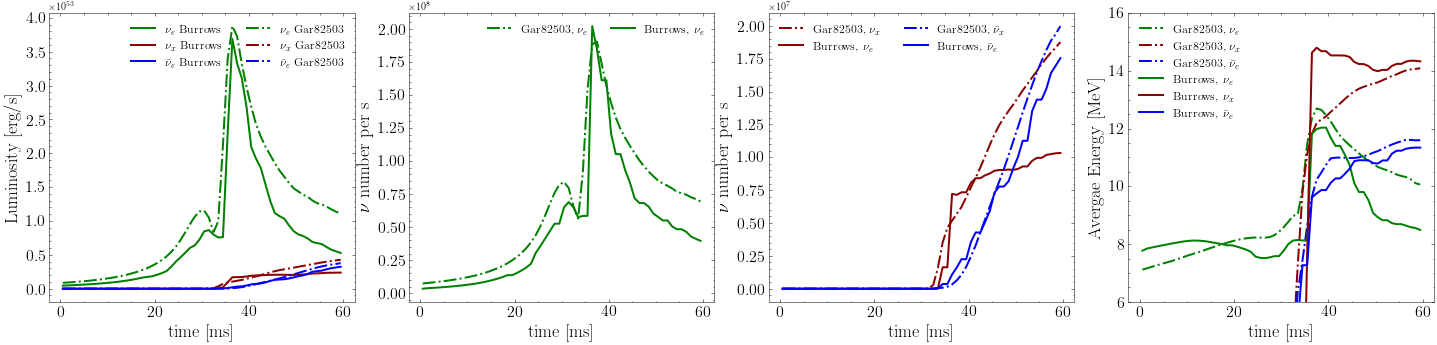

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import ROOT

def read_hist1d(filename, histname):
    f1 = ROOT.TFile(filename, 'read')
    h1 = f1.Get(histname)
    x = np.zeros(h1.GetNbinsX())
    y = np.zeros(h1.GetNbinsX())
    for i in range(h1.GetNbinsX()):
        x[i] = h1.GetBinCenter(i+1)
        y[i] = h1.GetBinContent(i+1)
    return x*1000, y


fig1, axes = plt.subplots(1, 4, figsize=(20, 5))

filename = "/junofs/users/miaoyu/supernova/production/PDFs/NeutrinoLuminosity_Burrows2D.root"

hn = "h1d_nue"
x, y = read_hist1d(filename, hn)
axes[0].plot(x, y, "-", lw=2, color="green", label=r"$\nu_e$ Burrows")

hn = "h1d_nux"
x, y = read_hist1d(filename, hn)
axes[0].plot(x, y, "-", lw=2, color="darkred", label=r"$\nu_x$ Burrows")

hn = "h1d_nuebar"
x, y = read_hist1d(filename, hn)
axes[0].plot(x, y, "-", lw=2, color="blue", label=r"$\bar\nu_e$ Burrows")

hn = "h1d_nuxbar"
x, y = read_hist1d(filename, hn)
#axes[0].plot(x, y, "-", lw=2, label=r"$\bar\nu_x$")


##################### YB 
filename = "/junofs/users/miaoyu/supernova/production/PDFs/NeutrinoLuminosity_Gar82503.root"

hn = "h1d_nue"
x, y = read_hist1d(filename, hn)
axes[0].plot(x+30, y, "-.", lw=2, color="green", label=r"$\nu_e$ Gar82503")

hn = "h1d_nux"
x, y = read_hist1d(filename, hn)
axes[0].plot(x+30, y, "-.", lw=2, color="darkred", label=r"$\nu_x$ Gar82503")

hn = "h1d_nuebar"
x, y = read_hist1d(filename, hn)
axes[0].plot(x+30, y, "-.", lw=2, color="blue", label=r"$\bar\nu_e$ Gar82503")

hn = "h1d_nuxbar"
x, y = read_hist1d(filename, hn)


axes[0].set_ylabel("Luminosity [erg/s]", fontsize=18)
#axes[0].set_ylabel("Average Energy [MeV]", fontsize=18)
axes[0].set_xlabel("time [ms]", fontsize=18)
axes[0].legend(ncol=2, prop={'size':12})
axes[0].tick_params(axis='both', which='major', labelsize=16, labelcolor="black")
#axe[0].semilogy()


x, y = read_hist1d("/junofs/users/miaoyu/supernova/wenlj/simulation/validater/NU_E_NevtTspecCompare_NO.root", "h1d_Gar")
axes[1].plot(x+30, y, "-.", color="green", lw=2, label=r"Gar82503, $\nu_e$")
x, y = read_hist1d("/junofs/users/miaoyu/supernova/wenlj/simulation/validater/NU_E_NevtTspecCompare_NO.root", "h1d_Bur")
axes[1].plot(x+30, y, "-", color="green", lw=2, label=r"Burrows, $\nu_e$")
axes[1].set_ylabel(r"$\nu$ number per s", fontsize=18)
axes[1].set_xlabel("time [ms]", fontsize=18)
axes[1].legend(ncol=2, prop={'size':12})
axes[1].tick_params(axis='both', which='major', labelsize=16, labelcolor="black")

x, y = read_hist1d("/junofs/users/miaoyu/supernova/wenlj/simulation/validater/NU_X_NevtTspecCompare_NO.root", "h1d_Gar")
axes[2].plot(x+30, y, "-.", color="darkred", lw=2, label=r"Gar82503, $\nu_x$")
x, y = read_hist1d("/junofs/users/miaoyu/supernova/wenlj/simulation/validater/NU_X_NevtTspecCompare_NO.root", "h1d_Bur")
axes[2].plot(x+30, y, "-", color="darkred", lw=2, label=r"Burrows, $\nu_e$")
x, y = read_hist1d("/junofs/users/miaoyu/supernova/wenlj/simulation/validater/NU_E_BAR_NevtTspecCompare_NO.root", "h1d_Gar")
axes[2].plot(x+30, y, "-.", color="blue", lw=2, label=r"Gar82503, $\bar\nu_x$")
x, y = read_hist1d("/junofs/users/miaoyu/supernova/wenlj/simulation/validater/NU_E_BAR_NevtTspecCompare_NO.root", "h1d_Bur")
axes[2].plot(x+30, y, "-", color="blue", lw=2, label=r"Burrows, $\bar\nu_e$")

axes[2].set_ylabel(r"$\nu$ number per s", fontsize=18)
axes[2].set_xlabel("time [ms]", fontsize=18)
axes[2].legend(ncol=2, prop={'size':12})
axes[2].tick_params(axis='both', which='major', labelsize=16, labelcolor="black")

x, y = read_hist1d("/junofs/users/miaoyu/supernova/wenlj/simulation/validater/NU_E_AveETspecCompare.root", "h1d_Gar")
y *= 1e50
axes[3].plot(x+30, y, "-.", color="green", lw=2, label=r"Gar82503, $\nu_e$")
x, y = read_hist1d("/junofs/users/miaoyu/supernova/wenlj/simulation/validater/NU_X_AveETspecCompare.root", "h1d_Gar")
y *= 1e50
axes[3].plot(x+30, y, "-.", color="darkred", lw=2, label=r"Gar82503, $\nu_x$")
x, y = read_hist1d("/junofs/users/miaoyu/supernova/wenlj/simulation/validater/NU_E_BAR_AveETspecCompare.root", "h1d_Gar")
y *= 1e50
axes[3].plot(x+30, y, "-.", color="blue", lw=2, label=r"Gar82503, $\bar\nu_e$")

x, y = read_hist1d("/junofs/users/miaoyu/supernova/wenlj/simulation/validater/NU_E_AveETspecCompare.root", "h1d_Bur")
axes[3].plot(x+30, y, "-", color="green", lw=2, label=r"Burrows, $\nu_e$")
x, y = read_hist1d("/junofs/users/miaoyu/supernova/wenlj/simulation/validater/NU_X_AveETspecCompare.root", "h1d_Bur")
y[x<5] = 0
axes[3].plot(x+30, y, "-", color="darkred", lw=2, label=r"Burrows, $\nu_x$")
x, y = read_hist1d("/junofs/users/miaoyu/supernova/wenlj/simulation/validater/NU_E_BAR_AveETspecCompare.root", "h1d_Bur")
axes[3].plot(x+30, y, "-", color="blue", lw=2, label=r"Burrows, $\bar\nu_e$")
axes[3].set_ylabel("Avergae Energy [MeV]", fontsize=18)
axes[3].set_xlabel("time [ms]", fontsize=18)
axes[3].legend(ncol=1, prop={'size':12})
axes[3].tick_params(axis='both', which='major', labelsize=16, labelcolor="black")
axes[3].set_ylim(6, 16)

plt.tight_layout()
plt.savefig("/junofs/users/miaoyu/supernova/analysis/MH/results/Compare_initSpec_Burrow2D12+Garching82503.pdf")
plt.show()





Another model used is the Nakatazo model from SNEWPY. It is a pinched model used numerical form to calculate neutrino fluence as what the Garching model does in simulation. The luminosity is relatively smaller compared the two models mentioned above, and is shown below. The shapes of luminosity for three flavours are different from the Garching model largely.

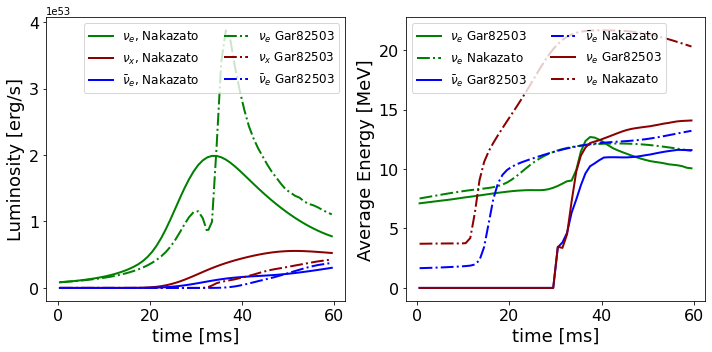

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import ROOT

def read_hist1d(filename, histname):
    f1 = ROOT.TFile(filename, 'read')
    h1 = f1.Get(histname)
    x = np.zeros(h1.GetNbinsX())
    y = np.zeros(h1.GetNbinsX())
    for i in range(h1.GetNbinsX()):
        x[i] = h1.GetBinCenter(i+1)
        y[i] = h1.GetBinContent(i+1)
    return x*1000, y


fig1, axes = plt.subplots(1, 2, figsize=(10, 5))

##################### YB 
filename = "/junofs/users/miaoyu/supernova/production/PDFs/NeutrinoLuminosity_Nakazato.root"

hn = "h1d_nue"
x, y = read_hist1d(filename, hn)
axes[0].plot(x, y, "-", lw=2, color="green", label=r"$\nu_e$, Nakazato")

hn = "h1d_nux"
x, y = read_hist1d(filename, hn)
axes[0].plot(x, y, "-", lw=2, color="darkred", label=r"$\nu_x$, Nakazato")

hn = "h1d_nuebar"
x, y = read_hist1d(filename, hn)
axes[0].plot(x, y, "-", lw=2, color="blue", label=r"$\bar\nu_e$, Nakazato")

hn = "h1d_nuxbar"
x, y = read_hist1d(filename, hn)

##################### YB 
filename = "/junofs/users/miaoyu/supernova/production/PDFs/NeutrinoLuminosity_Gar82503.root"

hn = "h1d_nue"
x, y = read_hist1d(filename, hn)
axes[0].plot(x+30, y, "-.", lw=2, color="green", label=r"$\nu_e$ Gar82503")

hn = "h1d_nux"
x, y = read_hist1d(filename, hn)
axes[0].plot(x+30, y, "-.", lw=2, color="darkred", label=r"$\nu_x$ Gar82503")

hn = "h1d_nuebar"
x, y = read_hist1d(filename, hn)
axes[0].plot(x+30, y, "-.", lw=2, color="blue", label=r"$\bar\nu_e$ Gar82503")


axes[0].set_ylabel("Luminosity [erg/s]", fontsize=18)
#axes[0].set_ylabel("Average Energy [MeV]", fontsize=18)
axes[0].set_xlabel("time [ms]", fontsize=18)
axes[0].legend(ncol=2, prop={'size':12})
axes[0].tick_params(axis='both', which='major', labelsize=16, labelcolor="black")
#axe[0].semilogy()

filename = "/junofs/users/miaoyu/supernova/wenlj/simulation/validater/NU_E_ETspecCompare.root"
hn = "h1d_Gar"
x, y = read_hist1d(filename, hn)
axes[1].plot(x+30, y*1e50, "-", lw=2, color="green", label=r"$\nu_e$ Gar82503")
hn = "h1d_Nak"
x, y = read_hist1d(filename, hn)
axes[1].plot(x+30, y, "-.", lw=2, color="green", label=r"$\nu_e$ Nakazato")


filename = "/junofs/users/miaoyu/supernova/wenlj/simulation/validater/NU_E_BAR_ETspecCompare.root"
hn = "h1d_Gar"
x, y = read_hist1d(filename, hn)
axes[1].plot(x+30, y*1e50, "-", lw=2, color="blue", label=r"$\bar\nu_e$ Gar82503")
hn = "h1d_Nak"
x, y = read_hist1d(filename, hn)
axes[1].plot(x+30, y, "-.", lw=2, color="blue", label=r"$\bar\nu_e$ Nakazato")

filename = "/junofs/users/miaoyu/supernova/wenlj/simulation/validater/NU_X_ETspecCompare.root"
hn = "h1d_Gar"
x, y = read_hist1d(filename, hn)
axes[1].plot(x+30, y*1e50, "-", lw=2, color="darkred", label=r"$\nu_e$ Gar82503")
hn = "h1d_Nak"
x, y = read_hist1d(filename, hn)
axes[1].plot(x+30, y, "-.", lw=2, color="darkred", label=r"$\nu_e$ Nakazato")


axes[1].set_ylabel("Average Energy [MeV]", fontsize=18)
axes[1].set_xlabel("time [ms]", fontsize=18)
axes[1].legend(ncol=2, prop={'size':12})
axes[1].tick_params(axis='both', which='major', labelsize=16, labelcolor="black")

plt.tight_layout()
plt.show()





### II (2). Visible Spectra Comparison (JUNO-cite)
The Supernova is assumed at a preferred distance, $10\,\mathrm{kpc}$. We study the supernova neutrinos explored in the JUNO detector, which has the capacity to detect different channels like proton elastic scattering (pES), electron elastic scattering (eES), inverse beta decay (IBD)... For a simple numerical study, no detailed detector response is simulated, only the proton quenching curve is added by hand. The event rate for three main channels (pES, eES, IBD) around the neutronlization burst from different Garching models are compared below. The shapes around the burst are similar among models, while the absolute event numbers and shapes extending to the accretion phases show larger deviation.

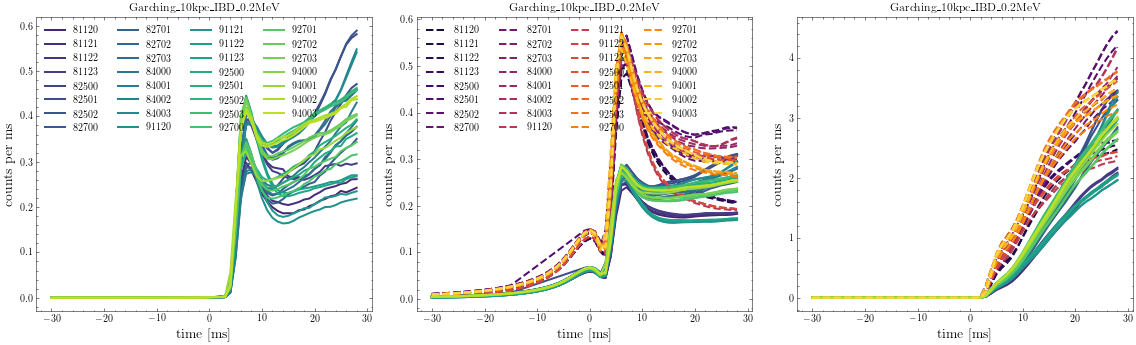

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def read_data_fromHL(filename):
    cc = 0
    T, N = [], []
    with open(filename) as f:
        nn = 0
        for lines in f.readlines():
            if cc == 6:
                T.append(t)
                N.append(nn)
                cc = 0
                nn = 0
            line = lines.strip("\n")
            data = line.split(" ")
            nn += float(data[2])
            t = float(data[0])
            cc += 1

    T = np.array(T) * 1000
    N = np.array(N) / 1000.
    return T, N

mod = [81120,81121,81122,81123,82500,82501,82502,82700,82701,82702,82703,84000,84001,84002,84003,91120,91121,91122,91123,92500,92501,92502,92503,92700,92701,92702,92703,94000,94001,94002,94003]
chaname = ["pES", "eES", "IBD"]
colors0 = mpl.cm.viridis(np.linspace(0.1,0.9, len(mod)))
colors1 = mpl.cm.inferno(np.linspace(0.1,0.9, len(mod)))
fig, axes = plt.subplots(1, 3, figsize=(16 ,5))
for i in range(len(mod)):
    for cha in [0, 1, 2]:
        imod = mod[i]
        if cha == 1 or cha == 2:
            mharr = [1, 2]
        elif cha == 0:
            mharr = [1]
        for imh in mharr:
            if imh == 1:
                MO = "NO"
            elif imh == 2:
                MO = "IO"
            filename = "/junofs/users/miaoyu/supernova/wenlj/simulation/examples/submit/Gar%d_cha%d_MH%d_Ethr%.2fMeV.txt"%(imod, cha, imh, 0.20)
            x, y = read_data_fromHL(filename)
            if cha == 0:
                axes[cha].plot(x, y, "-",  lw=2, color=colors0[i], label="%d"%imod)
            else:
                if imh == 1:
                    axes[cha].plot(x, y, "-",  lw=2, color=colors0[i])
                if imh == 2:
                    axes[cha].plot(x, y, "--", lw=2, color=colors1[i], label="%d"%imod)


axes[0].legend(ncol=4, prop={"size":10})
axes[0].set_xlabel("time [ms]", fontsize=14)
axes[0].set_ylabel("counts per ms", fontsize=14)
axes[0].set_title("Garching_10kpc_%s_0.2MeV"%(chaname[cha]))
axes[1].legend(ncol=4, prop={"size":10})
axes[1].set_xlabel("time [ms]", fontsize=14)
axes[1].set_ylabel("counts per ms", fontsize=14)
axes[1].set_title("Garching_10kpc_%s_0.2MeV"%(chaname[cha]))
axes[2].set_xlabel("time [ms]", fontsize=14)
axes[2].set_ylabel("counts per ms", fontsize=14)
axes[2].set_title("Garching_10kpc_%s_0.2MeV"%(chaname[cha]))

plt.tight_layout()
plt.savefig("/junofs/users/miaoyu/supernova/analysis/MH/results/VisibleSpectraComp_Garching.pdf")
plt.show()

The visible spectra of the Burrows model are compared with the Garching 82503 model and shown as below (left: pES channel, middle: eES channel, right: IBD channel). The black lines are results of the Garching model, while the colored lines are the Burrows model results.

- Burrows 2D model has a notably larger pES sample;
- Statistics of eES are similar at the burst while smaller in accretion phase for the Burrows model;
- Shapes of IBD event rate are different for two models with comparable statistics.

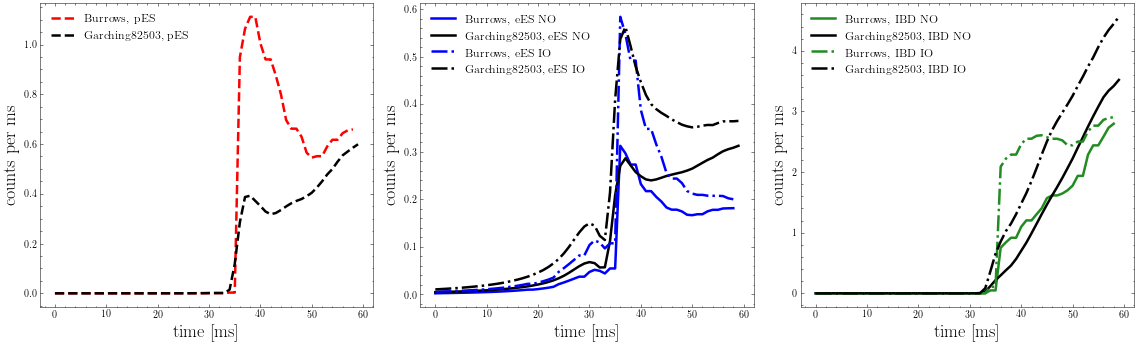

In [11]:
import numpy as np
import matplotlib.pyplot as plt
def read_data_fromHL(filename):
    cc = 0
    T, N = [], []
    with open(filename) as f:
        nn = 0
        for lines in f.readlines():
            if cc == 6:
                T.append(t)
                N.append(nn)
                cc = 0
                nn = 0
            line = lines.strip("\n")
            data = line.split(" ")
            nn += float(data[2])
            t = float(data[0])
            cc += 1

    T = np.array(T) * 1000
    N = np.array(N) / 1000.
    return T, N

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16, 5))
x, y = read_data_fromHL("/junofs/users/miaoyu/supernova/wenlj/simulation/examples/submit/Burrows2D_cha0_MH1_Ethr0.20MeV.txt")
ax0.plot(x, y*1e50, "--", lw=2.5, color="red", label="Burrows, pES")
x, y = read_data_fromHL("/junofs/users/miaoyu/supernova/production/PDFs/10kpc/pESrate.csv")
ax0.plot(x+30, y, "--", lw=2.5, color="black", label="Garching82503, pES")

x, y = read_data_fromHL("/junofs/users/miaoyu/supernova/wenlj/simulation/examples/submit/Burrows2D_cha1_MH1_Ethr0.20MeV.txt")
ax1.plot(x, y*1e50, "-", lw=2.5, color="blue", label="Burrows, eES NO")
x, y = read_data_fromHL("/junofs/users/miaoyu/supernova/production/PDFs/10kpc/eESrate_NO.csv")
ax1.plot(x+30, y, "-", lw=2.5, color="black", label="Garching82503, eES NO")
x, y = read_data_fromHL("/junofs/users/miaoyu/supernova/wenlj/simulation/examples/submit/Burrows2D_cha1_MH2_Ethr0.20MeV.txt")
ax1.plot(x, y*1e50, "-.", lw=2.5, color="blue", label="Burrows, eES IO")
x, y = read_data_fromHL("/junofs/users/miaoyu/supernova/production/PDFs/10kpc/eESrate_IO.csv")
ax1.plot(x+30, y, "-.", lw=2.5, color="black", label="Garching82503, eES IO")

x, y = read_data_fromHL("/junofs/users/miaoyu/supernova/wenlj/simulation/examples/submit/Burrows2D_cha2_MH1_Ethr0.20MeV.txt")
ax2.plot(x, y*1e50, "-", lw=2.5, color="forestgreen", label="Burrows, IBD NO")
x, y = read_data_fromHL("/junofs/users/miaoyu/supernova/production/PDFs/10kpc/IBDrate_NO.csv")
ax2.plot(x+30, y, "-", lw=2.5, color="black", label="Garching82503, IBD NO")
x, y = read_data_fromHL("/junofs/users/miaoyu/supernova/wenlj/simulation/examples/submit/Burrows2D_cha2_MH2_Ethr0.20MeV.txt")
ax2.plot(x, y*1e50, "-.", lw=2.5, color="forestgreen", label="Burrows, IBD IO")
x, y = read_data_fromHL("/junofs/users/miaoyu/supernova/production/PDFs/10kpc/IBDrate_IO.csv")
ax2.plot(x+30, y, "-.", lw=2.5, color="black", label="Garching82503, IBD IO")

ax0.legend(prop={"size":12})
ax0.set_xlabel("time [ms]", fontsize=18)
ax0.set_ylabel("counts per ms", fontsize=18)
ax1.legend(prop={"size":12})
ax1.set_xlabel("time [ms]", fontsize=18)
ax1.set_ylabel("counts per ms", fontsize=18)
ax2.legend(prop={"size":12})
ax2.set_xlabel("time [ms]", fontsize=18)
ax2.set_ylabel("counts per ms", fontsize=18)

plt.tight_layout()
plt.savefig("/junofs/users/miaoyu/supernova/analysis/MH/results/Compare_visibleSpec_Burrows2D12+Garching82503.pdf")

| Channels | Threshold | MO |Burrows 2D | Garching 82503 |
| --- | --- | ---| --- | ---|
| pES | 0.10 MeV | - | 21.70 | 14.14 | 
| pES | 0.15 MeV | - | 15.78 | 8.18 |
| pES | 0.20 MeV | - | 12.22 | 5.17 |
| eES | 0.20 MeV | NO | 3.79 | 4.75 |
| eES | 0.20 MeV | IO | 6.44 | 8.41 |
| IBD | 0.20 MeV | NO | 18.18 | 16.11 |
| IBD | 0.20 MeV | IO | 35.09 | 29.39 |

The expected event numgber of different channels in JUNO are shown in the above table. The statistics of two different models are comparable, where the Burrows 2D model has a larger pES sample, which may be helpful to improve the sensitivity.

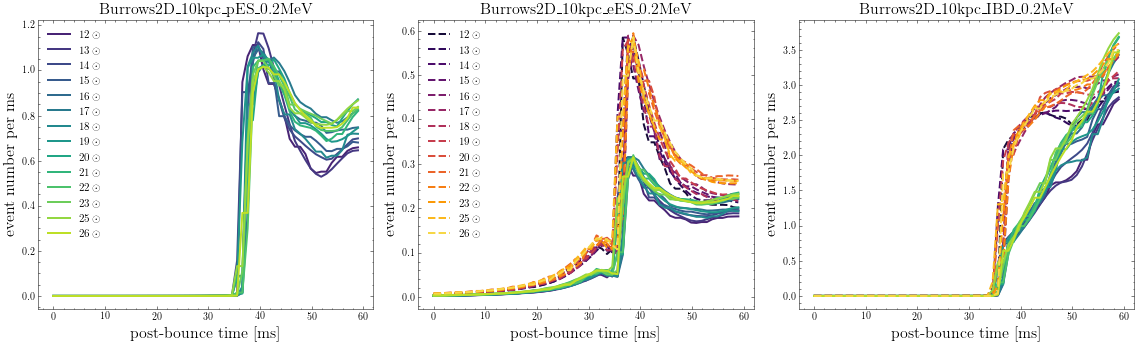

In [25]:
import ROOT
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

def read_hist_1D(filename):
    f = ROOT.TFile(filename, "read")
    h = f.Get("h1")
    x , y = [], []
    for i in range(h.GetNbinsX()-1):
        x.append(h.GetBinCenter(i+1))
        y.append(h.GetBinContent(i+1))

    x = np.array(x) 
    y = np.array(y) 
    return x, y 

mass = [12, 13, 14, 15, 16, 17, 18, 19, 20 ,21, 22, 23, 25, 26]

fig, axs = plt.subplots(1, 3, figsize=(16, 5))
colors0 = mpl.cm.viridis(np.linspace(0.1,0.9, len(mass)))
colors1 = mpl.cm.inferno(np.linspace(0.1,0.9, len(mass)))

for im in range(len(mass)): 
    filename = "/junofs/users/miaoyu/supernova/production/PDFs/10kpc/Burrows2D%d_PDF_IO_10kpc_pES_0.20MeV.root"%(mass[im])
    x , y = read_hist_1D(filename)
    axs[0].plot(x, y, color=colors0[im], lw=2, label=r"$%d\,\odot$"%mass[im])

    filename = "/junofs/users/miaoyu/supernova/production/PDFs/10kpc/Burrows2D%d_PDF_NO_10kpc_eES_0.20MeV.root"%(mass[im])
    x , y = read_hist_1D(filename)
    axs[1].plot(x, y, color=colors0[im], lw=2)

    filename = "/junofs/users/miaoyu/supernova/production/PDFs/10kpc/Burrows2D%d_PDF_IO_10kpc_eES_0.20MeV.root"%(mass[im])
    x , y = read_hist_1D(filename)
    axs[1].plot(x, y, "--", color=colors1[im], lw=2, label=r"$%d\,\odot$"%mass[im])

    filename = "/junofs/users/miaoyu/supernova/production/PDFs/10kpc/Burrows2D%d_PDF_NO_10kpc_IBD_0.20MeV.root"%(mass[im])
    x , y = read_hist_1D(filename)
    axs[2].plot(x, y, color=colors0[im], lw=2, label=r"$12\,\odot$")

    filename = "/junofs/users/miaoyu/supernova/production/PDFs/10kpc/Burrows2D%d_PDF_IO_10kpc_IBD_0.20MeV.root"%(mass[im])
    x , y = read_hist_1D(filename)
    axs[2].plot(x, y, "--", color=colors1[im], lw=2, label=r"$12\,\odot$")


    axs[0].set_xlabel("post-bounce time [ms]", fontsize=16)
    axs[0].set_ylabel("event number per ms", fontsize=16)
    axs[0].legend(prop={"size":11})
    axs[0].set_title("Burrows2D_10kpc_pES_0.2MeV", fontsize=16)
    axs[1].set_xlabel("post-bounce time [ms]", fontsize=16)
    axs[1].set_ylabel("event number per ms", fontsize=16)
    axs[1].legend(prop={"size":11})
    axs[1].set_title("Burrows2D_10kpc_eES_0.2MeV", fontsize=16)
    axs[2].set_xlabel("post-bounce time [ms]", fontsize=16)
    axs[2].set_ylabel("event number per ms", fontsize=16)
    axs[2].set_title("Burrows2D_10kpc_IBD_0.2MeV", fontsize=16)

    plt.tight_layout()
    plt.savefig("/junofs/users/miaoyu/supernova/analysis/MH/results/Compare_visibleSpec_Burrows2D.pdf")



## III. Statistical Method
We use unbinned maximum likelihood estimation method here. The likelihood form is like:
$$
\mathcal{L} = e^{-\int_0^T R(t)dt} \times \prod_{i=1}^N \int_{E_\mathrm{thr}}^{E_\mathrm{max}} R(t_i, E_\mathrm{vis}) \mathrm{d}E_\mathrm{vis},
$$
[*Lu, J. S., Cao, J., Li, Y. F., & Zhou, S. (2015). Journal of Cosmology and Astroparticle Physics, 2015(05), 044.*]

where $R(t_i', E_\mathrm{vis})$ represents the visible event rate per unit time and per unit visible energy. In the fitting procedure, the likelihood ratio is minimized. For each dataset, we have a local minimum likelihood value with both the NO PDF and the IO PDF. And then we define the medium value of $\Delta \chi^2$ with definition:
$$
\Delta \chi^2 = -2 \ln \mathcal{L},
$$
as the medium sensitivity of the mass ordering determination.

## IV. Preliminary Results of Sensitivity
Combining the three main channels give the preliminary sensitivy of the mass ordering. The results of Garching 82503 model are shown as below ($E_\mathrm{thr}$ is set as $0.15\,\mathrm{MeV}$ and $0.20\,\mathrm{MeV}$ respectively).

For the first test, the toyMC data are generated in a $40\,\mathrm{ms}$ time window ($-20\,\mathrm{ms}$ to $20\,\mathrm{ms}$ for Garching models and $10\,\mathrm{ms}$ to $50\,\mathrm{ms}$ for Burrows 2D models) with **fixed** number (integral from PDFs). 500 supernova explosion events are simulated for each PDF without considering possible backgrounds. The corresponding time spectra of visible events are used for fitting, where only the time shift ($\mathrm{d}T$) is considered as a variable during fitting. Therefore, there is no "fitting" actually and only likelihood scanning with changed time window.

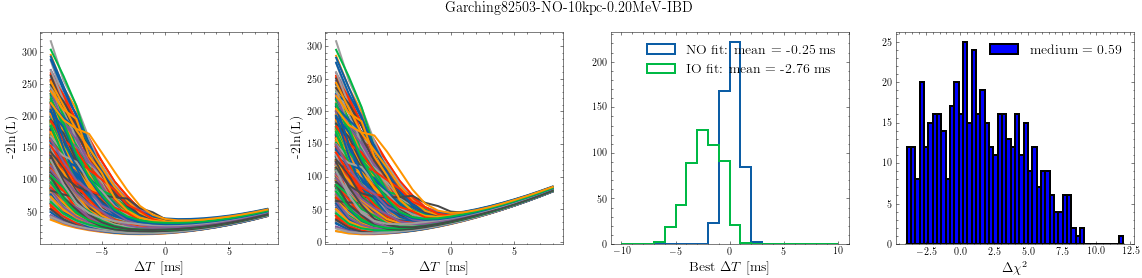

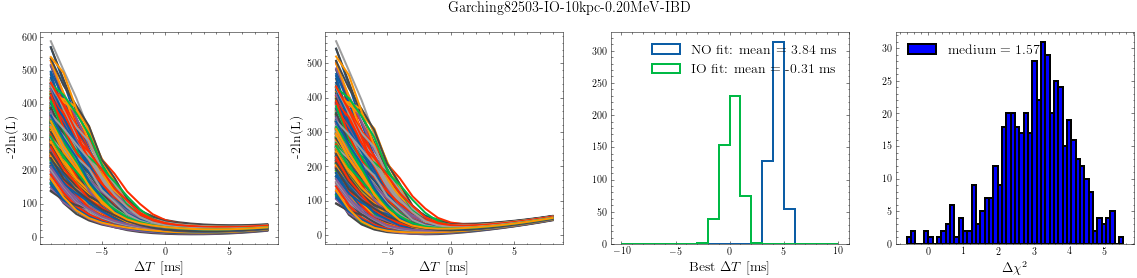

In [27]:
### GARCHING 82503， combining different channels...
#%run /junofs/users/miaoyu/supernova/analysis/MH/scan_NLL_combined.py -modelName Garching -modelNo 82503 -cha1 pES -cha2 IBD  -mo NO -Ethr 0.15 -draw True
#%run /junofs/users/miaoyu/supernova/analysis/MH/scan_NLL_combined.py -modelName Garching -modelNo 82503 -cha1 pES -cha2 IBD  -mo IO -Ethr 0.15 -draw True
#%run /junofs/users/miaoyu/supernova/analysis/MH/scan_NLL_combined.py -modelName Garching -modelNo 82503 -cha1 pES -cha2 IBD  -mo NO -Ethr 0.10 -draw True
#%run /junofs/users/miaoyu/supernova/analysis/MH/scan_NLL_combined.py -modelName Garching -modelNo 82503 -cha1 pES -cha2 IBD  -mo IO -Ethr 0.10 -draw True
%run /junofs/users/miaoyu/supernova/analysis/MH/scan_NLL_combined.py -modelName Garching -modelNo 82503 -cha1 IBD -mo NO -Ethr 0.20 -draw True
%run /junofs/users/miaoyu/supernova/analysis/MH/scan_NLL_combined.py -modelName Garching -modelNo 82503 -cha1 IBD -mo IO -Ethr 0.20 -draw True

The Burrows 2D model with 12 solar masses give the sensitivity results as below.

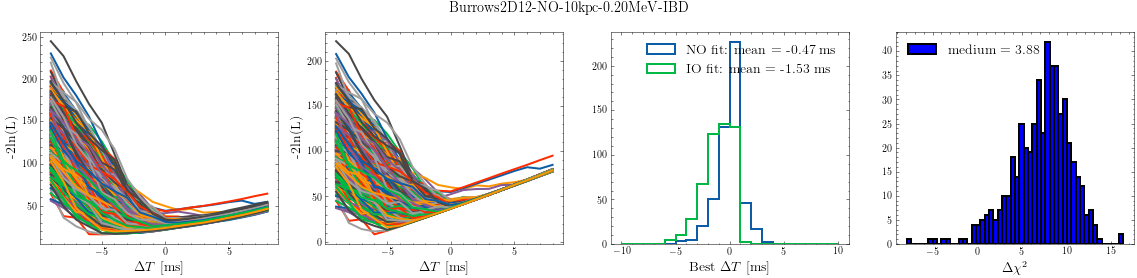

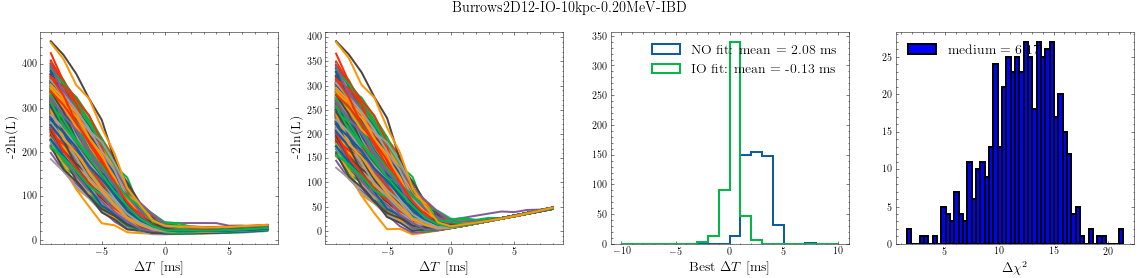

In [28]:
### Burrows2D 12 masses， combining different channels...
#%run /junofs/users/miaoyu/supernova/analysis/MH/scan_NLL_combined.py -modelName Burrows2D -modelNo 12 -cha1 pES -cha2 IBD -cha3 eES -mo NO -Ethr 0.15 -draw True
#%run /junofs/users/miaoyu/supernova/analysis/MH/scan_NLL_combined.py -modelName Burrows2D -modelNo 12 -cha1 pES -cha2 IBD -cha3 eES -mo IO -Ethr 0.15 -draw True
#%run /junofs/users/miaoyu/supernova/analysis/MH/scan_NLL_combined.py -modelName Burrows2D -modelNo 12 -cha1 pES -cha2 IBD -cha3 eES -mo NO -Ethr 0.10 -draw True
#%run /junofs/users/miaoyu/supernova/analysis/MH/scan_NLL_combined.py -modelName Burrows2D -modelNo 12 -cha1 pES -cha2 IBD -cha3 eES -mo IO -Ethr 0.10 -draw True
%run /junofs/users/miaoyu/supernova/analysis/MH/scan_NLL_combined.py -modelName Burrows2D -modelNo 12 -cha1 IBD -mo NO -Ethr 0.20 -draw True
%run /junofs/users/miaoyu/supernova/analysis/MH/scan_NLL_combined.py -modelName Burrows2D -modelNo 12 -cha1 IBD -mo IO -Ethr 0.20 -draw True

The sensitivity and statistics of 32 different Garching models are compared below.

Maximum, medium and minimum sensitivity for NO data: 3.55, 2.94, 2.27
Maximum, medium and minimum sensitivity for IO data: 5.43, 4.02, 3.33


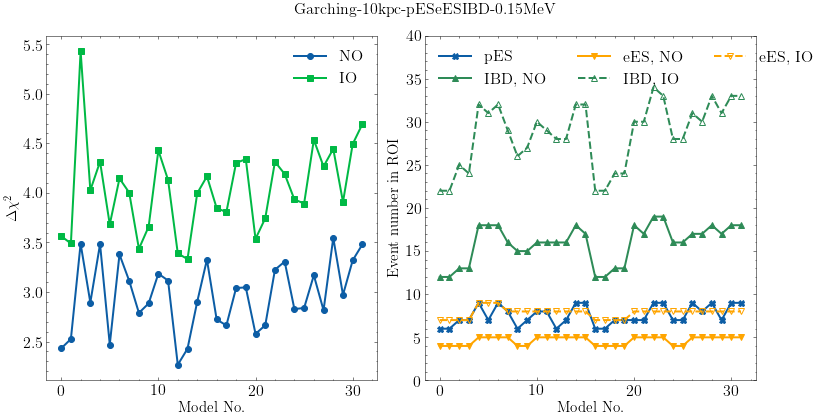

Maximum, medium and minimum sensitivity for NO data: 3.99, 3.33, 2.64
Maximum, medium and minimum sensitivity for IO data: 6.31, 4.62, 3.92


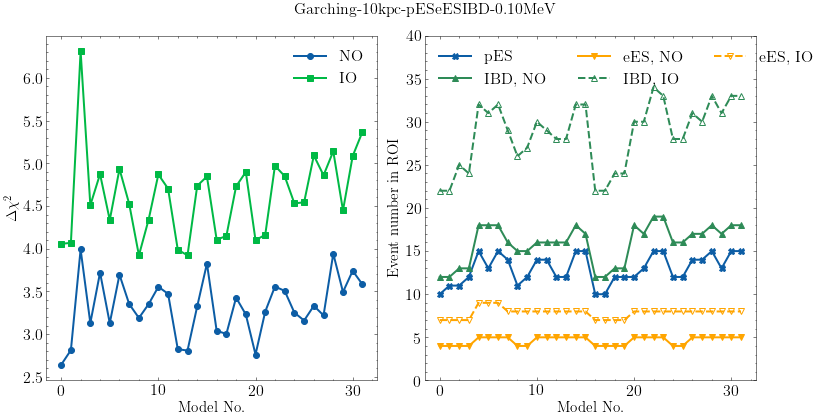

In [9]:
%run /junofs/users/miaoyu/supernova/analysis/MH/sens.py -Ethr 0.15 -model Garching32
%run /junofs/users/miaoyu/supernova/analysis/MH/sens.py -Ethr 0.10 -model Garching32

Maximum, medium and minimum sensitivity for NO data: 5.69, 4.58, 3.95
Maximum, medium and minimum sensitivity for IO data: 7.73, 6.74, 6.02


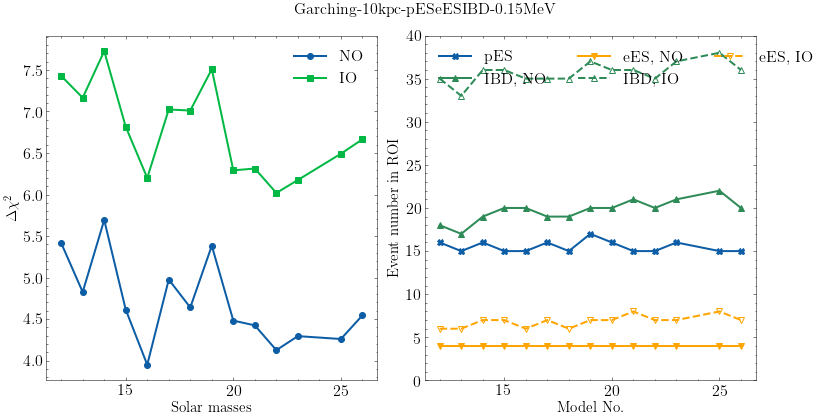

Maximum, medium and minimum sensitivity for NO data: 5.79, 4.79, 4.10
Maximum, medium and minimum sensitivity for IO data: 7.83, 6.93, 6.08


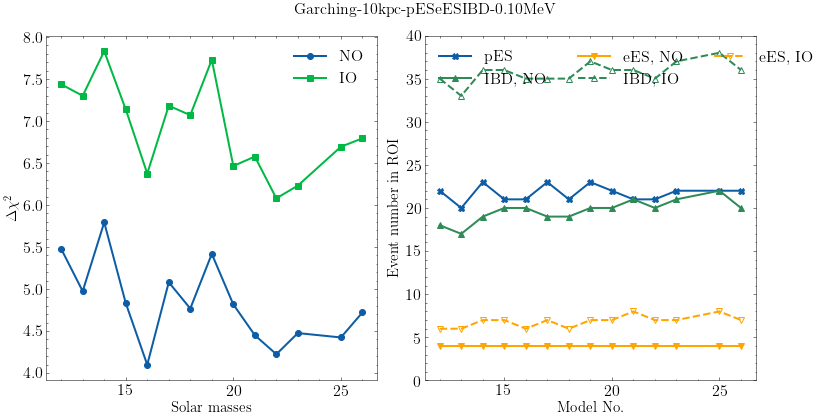

In [26]:
%run /junofs/users/miaoyu/supernova/analysis/MH/sens.py -Ethr 0.15 -model Burrows2D6000
%run /junofs/users/miaoyu/supernova/analysis/MH/sens.py -Ethr 0.10 -model Burrows2D6000

A simple conclusion would be:
- For all Garching models:
    - $E_{\mathrm{thr}} = 0.15\,\mathrm{MeV}$, NO data has the maximum, median and minimum sensitivity $\Delta \chi^2$ as $3.55, 2.94, 2.27$; IO data has the maximum, median and minimum sensitivity $\Delta \chi^2$ as $5.43, 4.02, 3.33$;
    - $E_{\mathrm{thr}} = 0.10\,\mathrm{MeV}$, NO data has the maximum, median and minimum sensitivity $\Delta \chi^2$ as $3.99, 3.33, 2.64$; IO data has the maximum, median and minimum sensitivity $\Delta \chi^2$ as $6.31, 4.62, 3.92$;
- The Burrows 2D model with 12 solar masses has a relatively better sensitivity:
    - $E_{\mathrm{thr}} = 0.15\,\mathrm{MeV}$, NO data has the maximum, median and minimum sensitivity $\Delta \chi^2$ as $5.69, 4.58, 3.95$; IO data has the maximum, median and minimum sensitivity $\Delta \chi^2$ as $7.73, 6.74, 6.02$
    - $E_{\mathrm{thr}} = 0.10\,\mathrm{MeV}$, NO data has the maximum, median and minimum sensitivity $\Delta \chi^2$ as $5.79, 4.79, 4.10$; IO data has the maximum, median and minimum sensitivity $\Delta \chi^2$ as $7.83, 6.93, 6.08$

The Burrows 2D model has a larger statistics pES samples compare to all Garching models, which improve the sensitivity largely. Also, the shapes of IBD visible spectra are more separated compared to the Garching models, which mainly origin from the $\nu_x$ flux spectra during the burst evolution. Therefore, the sensitivity are better there.  